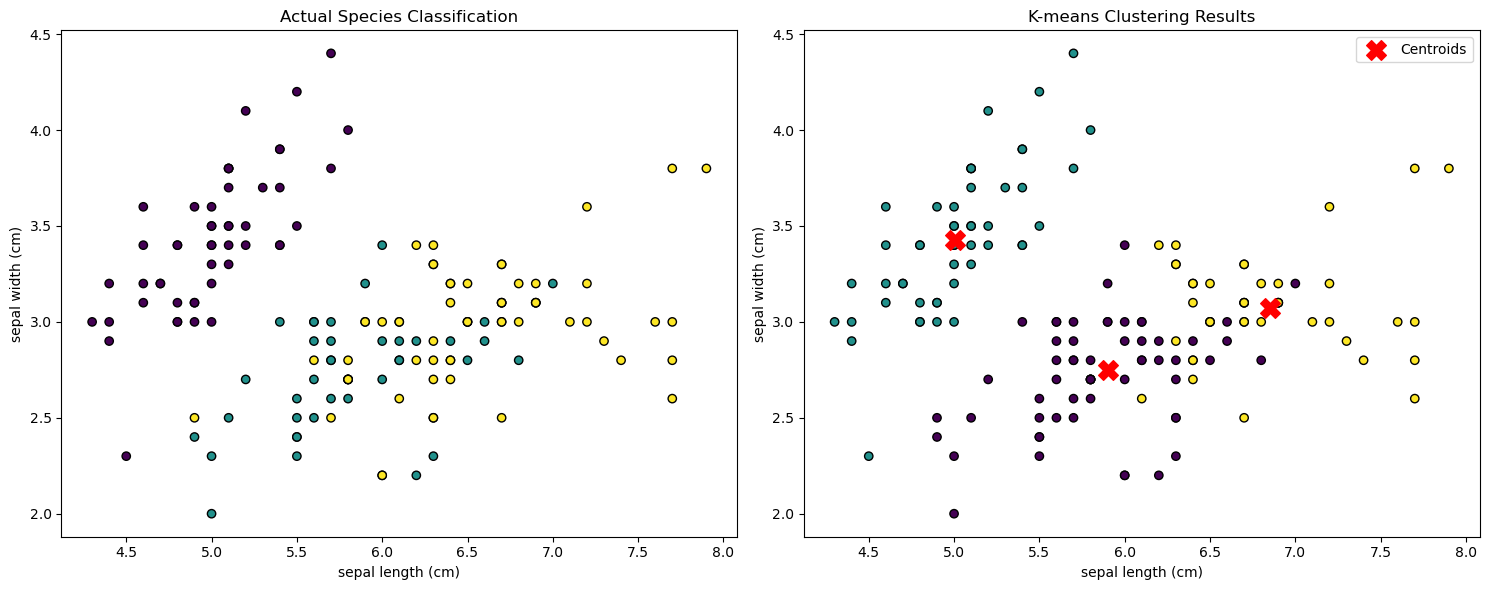

In [3]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
X = iris.data  # Features
y = iris.target  # Actual species (for comparison)

# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans.fit(X)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Plotting setup
plt.figure(figsize=(15, 6))

# Plot 1: Actual Species (Ground Truth)
plt.subplot(1, 2, 1)
scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k')
plt.title('Actual Species Classification')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])

# Plot 2: K-means Clustering Results
plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', edgecolor='k')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=200, c='red', label='Centroids')
plt.title('K-means Clustering Results')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.legend()

plt.tight_layout()
plt.show()

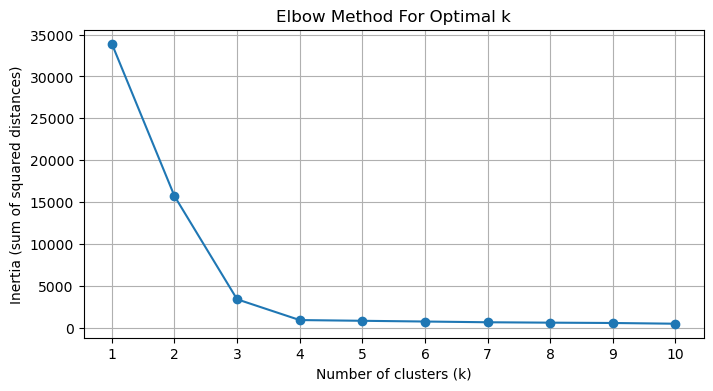

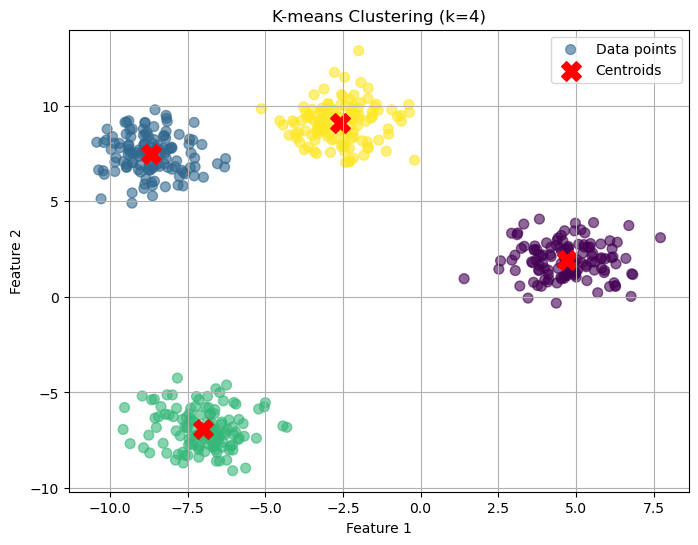

Clustering accuracy: 100.00%
Clustering error rate: 0.00%


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from scipy.optimize import linear_sum_assignment
from sklearn.metrics import confusion_matrix

# 1. Generate synthetic dataset
n_samples = 500
true_k = 4  # number of true clusters
X, y_true = make_blobs(n_samples=n_samples,
                       centers=true_k,
                       cluster_std=1.0,
                       random_state=42)

# 2. Determine optimal k using the elbow method
inertia_list = []
k_values = range(1, 11)  # testing k from 1 to 10

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia_list.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 4))
plt.plot(k_values, inertia_list, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia (sum of squared distances)')
plt.title('Elbow Method For Optimal k')
plt.xticks(k_values)
plt.grid(True)
plt.show()

# 3. Fit KMeans with chosen k (here we choose k=4 based on the elbow method)
optimal_k = 4
kmeans_opt = KMeans(n_clusters=optimal_k, random_state=42)
y_pred = kmeans_opt.fit_predict(X)

# Plot the clustering result
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=50, cmap='viridis', alpha=0.6, label='Data points')
plt.scatter(kmeans_opt.cluster_centers_[:, 0], kmeans_opt.cluster_centers_[:, 1],
            c='red', s=200, marker='X', label='Centroids')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-means Clustering (k=4)')
plt.legend()
plt.grid(True)
plt.show()

# 4. Compute error rate by comparing clustering to the true labels
# Since cluster labels are arbitrary, we find the best mapping using the Hungarian algorithm.

def calculate_clustering_error(y_true, y_pred):
    """
    Compute the clustering error by finding the best one-to-one mapping between
    predicted cluster labels and true labels.
    """
    # Build confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    
    # The Hungarian algorithm finds the maximum matching. Since we want to maximize
    # the number of correct matches, we can use the cost as -cm.
    row_ind, col_ind = linear_sum_assignment(-cm)
    
    # Compute total number of correctly matched labels
    total_correct = cm[row_ind, col_ind].sum()
    accuracy = total_correct / np.sum(cm)
    error_rate = 1 - accuracy
    return accuracy, error_rate

accuracy, error_rate = calculate_clustering_error(y_true, y_pred)
print(f'Clustering accuracy: {accuracy*100:.2f}%')
print(f'Clustering error rate: {error_rate*100:.2f}%')


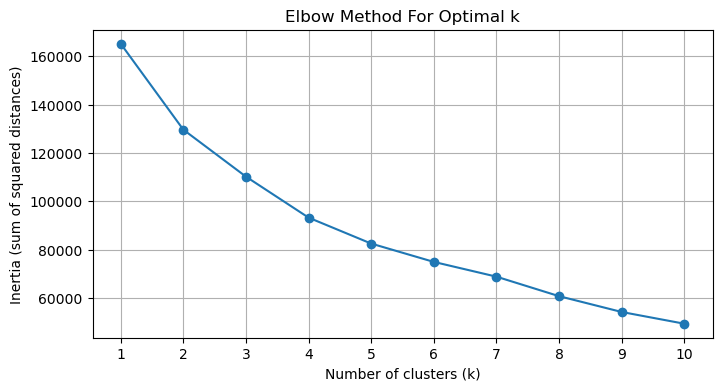

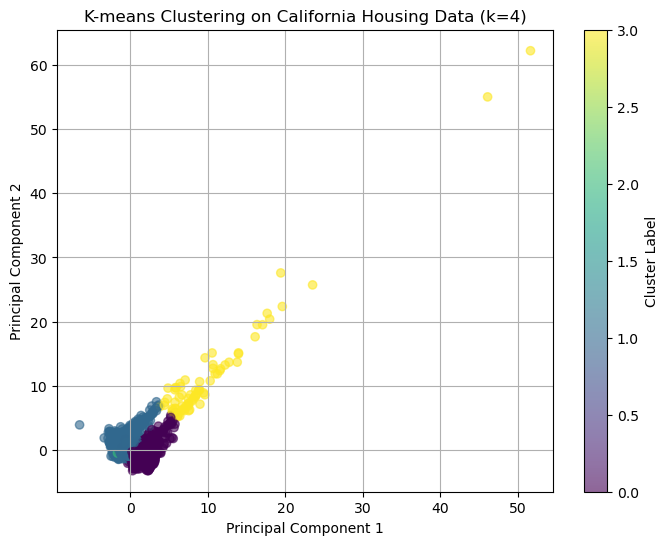

Clustering accuracy (compared to discretized median house value): 29.82%
Clustering error rate: 70.18%


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.optimize import linear_sum_assignment
from sklearn.metrics import confusion_matrix

# 1. Load and preprocess the California Housing dataset
data = fetch_california_housing()
X = data.data       # features
y_cont = data.target  # continuous target (median house value)

# Standardize the features for k-means clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2. Use the elbow method to decide on the number of clusters
inertia_list = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia_list.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 4))
plt.plot(k_values, inertia_list, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia (sum of squared distances)')
plt.title('Elbow Method For Optimal k')
plt.xticks(k_values)
plt.grid(True)
plt.show()

# 3. Run k-means clustering using a chosen k
# Here we choose k = 4 based on the elbow plot
optimal_k = 4
kmeans_opt = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
y_pred = kmeans_opt.fit_predict(X_scaled)

# 4. Visualize the clusters using PCA to reduce the data to 2 dimensions
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred, cmap='viridis', alpha=0.6)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-means Clustering on California Housing Data (k=4)')
plt.colorbar(scatter, label='Cluster Label')
plt.grid(True)
plt.show()

# 5. Create a pseudo ground truth by binning the continuous target
# We use quartiles to create 4 bins for demonstration.
bins = np.percentile(y_cont, [0, 25, 50, 75, 100])
y_true = np.digitize(y_cont, bins[1:-1])  # This will yield 0,1,2,3 for the 4 bins

# Function to compute clustering accuracy and error rate via the Hungarian algorithm
def calculate_clustering_error(y_true, y_pred):
    """
    Compute the clustering error by finding the best one-to-one mapping between
    predicted cluster labels and true labels using the Hungarian algorithm.
    """
    cm = confusion_matrix(y_true, y_pred)
    row_ind, col_ind = linear_sum_assignment(-cm)  # maximize matching by minimizing negative counts
    total_correct = cm[row_ind, col_ind].sum()
    accuracy = total_correct / np.sum(cm)
    error_rate = 1 - accuracy
    return accuracy, error_rate

accuracy, error_rate = calculate_clustering_error(y_true, y_pred)
print(f'Clustering accuracy (compared to discretized median house value): {accuracy*100:.2f}%')
print(f'Clustering error rate: {error_rate*100:.2f}%')


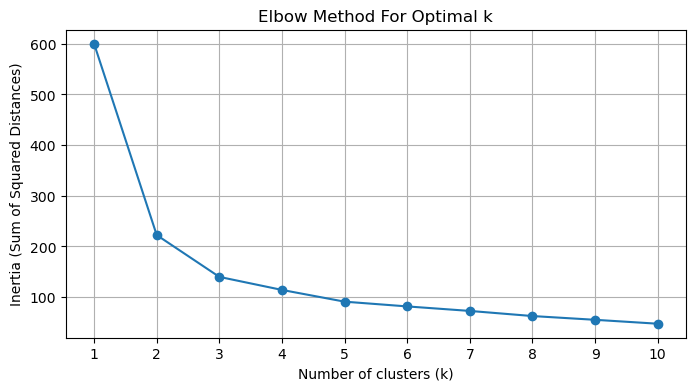

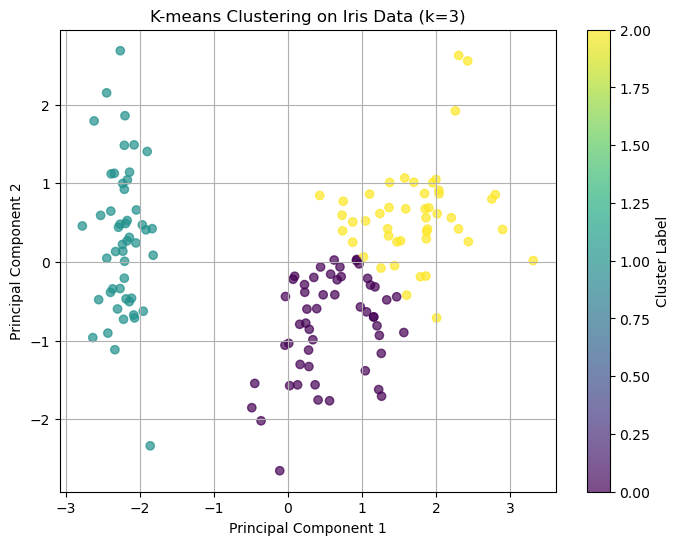

Clustering accuracy: 83.33%
Clustering error rate: 16.67%


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
from scipy.optimize import linear_sum_assignment

# 1. Load and preprocess the Iris dataset
iris = load_iris()
X = iris.data         # Features: sepal length, sepal width, petal length, petal width
y_true = iris.target  # True labels: 0, 1, 2 for the three iris species

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2. Determine optimal k using the elbow method
inertia_list = []
k_values = range(1, 11)  # Testing k from 1 to 10

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia_list.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 4))
plt.plot(k_values, inertia_list, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.title('Elbow Method For Optimal k')
plt.xticks(k_values)
plt.grid(True)
plt.show()

# 3. Run k-means clustering using k=3 (since the Iris dataset has 3 species)
optimal_k = 3
kmeans_opt = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
y_pred = kmeans_opt.fit_predict(X_scaled)

# 4. Visualize the clusters using PCA (reducing data to 2 dimensions)
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred, cmap='viridis', alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-means Clustering on Iris Data (k=3)')
plt.colorbar(scatter, label='Cluster Label')
plt.grid(True)
plt.show()

# 5. Compute the clustering error using the Hungarian algorithm
def calculate_clustering_error(y_true, y_pred):
    """
    Compute the clustering error by matching predicted cluster labels to true labels
    using the Hungarian algorithm.
    """
    # Create a confusion matrix where rows are true labels and columns are predicted labels
    cm = confusion_matrix(y_true, y_pred)
    # The Hungarian algorithm finds the best assignment (we maximize correct matches)
    row_ind, col_ind = linear_sum_assignment(-cm)  # maximizing the matching is equivalent to minimizing negative counts
    total_correct = cm[row_ind, col_ind].sum()
    accuracy = total_correct / np.sum(cm)
    error_rate = 1 - accuracy
    return accuracy, error_rate

accuracy, error_rate = calculate_clustering_error(y_true, y_pred)
print(f'Clustering accuracy: {accuracy*100:.2f}%')
print(f'Clustering error rate: {error_rate*100:.2f}%')


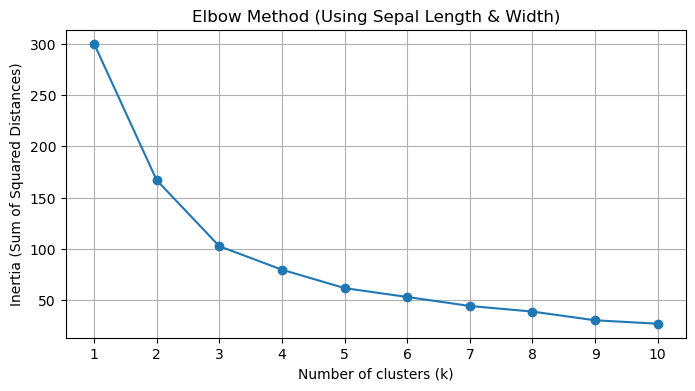

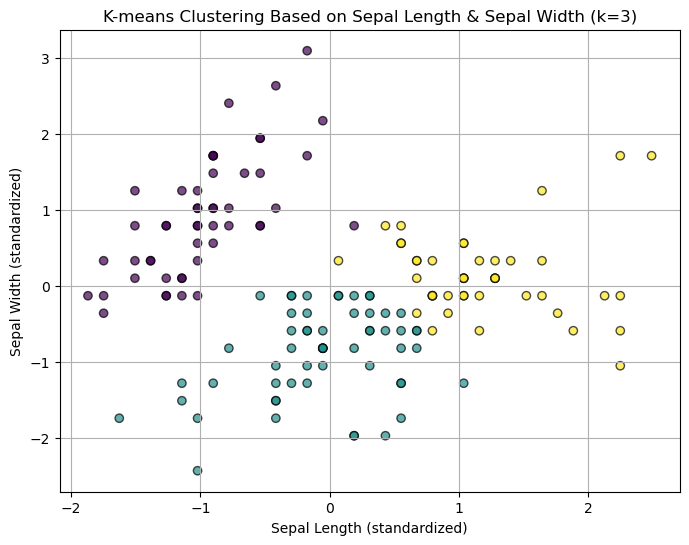

Clustering accuracy: 76.67%
Clustering error rate: 23.33%


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
from scipy.optimize import linear_sum_assignment

# 1. Load the Iris dataset
iris = load_iris()
X_full = iris.data         # All features: [sepal length, sepal width, petal length, petal width]
y_true = iris.target       # True labels: 0, 1, 2

# 2. Select only sepal length and sepal width for clustering
#    These are the first two columns of the dataset.
X = X_full[:, :2]

# Standardize these features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Determine the optimal number of clusters using the elbow method
inertia_list = []
k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia_list.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 4))
plt.plot(k_values, inertia_list, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.title('Elbow Method (Using Sepal Length & Width)')
plt.xticks(k_values)
plt.grid(True)
plt.show()

# 4. Run k-means clustering using k=3 (as we know Iris has 3 species)
optimal_k = 3
kmeans_opt = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
y_pred = kmeans_opt.fit_predict(X_scaled)

# 5. Visualize the clusters using the original two features (sepal length and sepal width)
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_pred, cmap='viridis', alpha=0.7, edgecolor='k')
plt.xlabel('Sepal Length (standardized)')
plt.ylabel('Sepal Width (standardized)')
plt.title('K-means Clustering Based on Sepal Length & Sepal Width (k=3)')
plt.grid(True)
plt.show()

# 6. (Optional) Compute the clustering error compared to true labels
def calculate_clustering_error(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    row_ind, col_ind = linear_sum_assignment(-cm)
    total_correct = cm[row_ind, col_ind].sum()
    accuracy = total_correct / np.sum(cm)
    error_rate = 1 - accuracy
    return accuracy, error_rate

accuracy, error_rate = calculate_clustering_error(y_true, y_pred)
print(f'Clustering accuracy: {accuracy*100:.2f}%')
print(f'Clustering error rate: {error_rate*100:.2f}%')
